### OpenCV
- Open Source Computer Vision Library는 오픈소스 이미지(동영상) 라이브러리
- 이미지 형식 변환, 필터 처리, 얼굴 인식, 물체 인식, 문자 인식 등 이미지와 관련된 다양한 처리
- 머신러닝에서 OpenCV 사용 : 머신러닝의 입력으로 전달하려면 이미지를 숫자 배열 데이터로 변경
- pip install opencv-python

In [8]:
# 얼굴 인식은 문제 없으므로 4.0대 최근 버전 사용
!pip install opencv-python

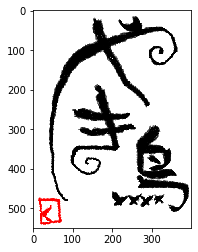

In [5]:
# 이미지 다운로드
# urllib.request 모듈은 웹사이트 데이터 접근
import urllib.request as req
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
url = 'http://uta.pw/shodou/img/28/214.png'
# url = 'https://image.shutterstock.com/z/stock-photo-group-of-people-602783837.jpg'
# url = 'https://image.shutterstock.com/z/stock-photo-happy-cheerful-young-woman-wearing-her-red-hair-\
# in-bun-rejoicing-at-positive-news-or-birthday-gift-613759379.jpg'
# url = 'https://image.shutterstock.com/z/stock-photo-happy-diverse-professional-business-team-stand-in-office-\
# looking-at-camera-smiling-young-and-old-1437231731.jpg'
req.urlretrieve(url, './facedata/sample.png')  # download

# OpenCV로 읽어 들이기
img = cv2.imread('./facedata/sample.png')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # 이미지 출력
# OpenCV BGR(파녹빨) 인 반면 matplotlib RGB(빨녹파) 순서
# (BGR to RGB)
plt.show()

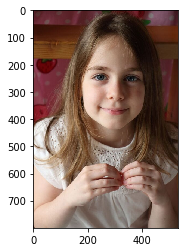

True

In [12]:
# 다운로드한 이미지 출력하기
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

filepath = './facedata/girl.png'
img = cv2.imread(filepath)
# plt.axis('off') # axis 출력 끄기
# OpenCV BGR(파녹빨) 인 반면 matplotlib RGB(빨녹파) 순서
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # 이미지 출력
plt.show()

# 이미지 저장하기
cv2.imwrite("./facedata/girl.png", img)

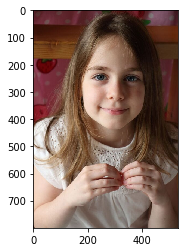

True

In [15]:
import cv2

# 이미지 읽어 들이기
filepath = './facedata/girl.png'
img = cv2.imread(filepath)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# 이미지 저장하기
cv2.imwrite("./facedata/out.png", img)

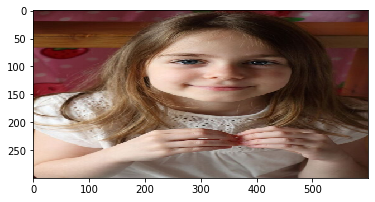

In [16]:
# resize

import matplotlib.pyplot as plt
import cv2

# 이미지 읽어 들이기
img = cv2.imread('./facedata/out.png')

# plt.axis('off')

# 이미지 크기 변경하기
im2 = cv2.resize(img, (600, 300)) # img, (width, height)
# 크기 변경한 이미지 저장하기
cv2.imwrite('./facedata.out-resize.png', im2)

# 이미지 출력하기
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()

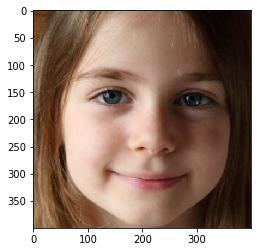

In [29]:
import matplotlib.pyplot as plt
import cv2

# 이미지 읽어 들이기
img = cv2.imread("./facedata/out.png")
# plt.axis('off')
# 이미지 자르기
im2 = img[120:440, 140:440]  # y1:y2, x1:x2
# 이미지 크기 변경하기
im2 = cv2.resize(im2, (400, 400))
# 크기 변경한 이미지 저장하기
cv2.imwrite("./facedata/cut-resize.png", im2)

# 이미지 출력하기
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()

#### 얼굴 검출 - 자동으로 얼굴에 모자이크 처리
- 인간의 얼굴이 어디 있는지 검출
- 사람의 얼굴을 검출하고 자동으로 모자이크 처리\
사생활 보호를 위해 관계없는 사람의 얼굴 자동으로 모자이크 처리\
얼굴 인식을 사용해 사람 얼굴이 있는 사진을 자동으로 수집

얼굴의 좌표 = 319 308 405 405


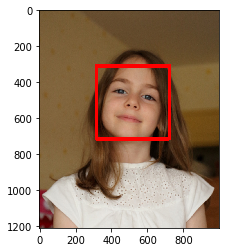

In [32]:
import matplotlib.pyplot as plt
import cv2

# 캐스케이드 파일 지정해서 검출기 생성하기
# OpenCV는 Haar-like 특징 학습기라고 부르는 머신러닝을 사용해 얼굴 인식
# 캐스케이드 파일(얼굴 요소 DB)를 사용해 눈, 코, 잎과 같은 요소의 위치 관계를 확인하고 얼굴인지 확인

# 유용한 사이트이므로 알아둘 것!
# https://github.com/opencv/opencv/tree/master/data/haarcascades
# 얼굴 검출 전용 캐스케이드 파일 외 정면 얼굴, 웃는 얼굴, 눈, 몸 전체를 검출하는 다양한 캐스케이드 파일
cascade_file = "./facedata/haarcascade_frontalface_alt.xml" # 정면 얼굴
cascade = cv2.CascadeClassifier(cascade_file) # 검출기는 캐스캐이드 파일을 지정해 다양한 물체 검출

# 이미지를 읽어 들이고 그레이스케일로 변환
# 밝은 부분은 흰색, 어두운 부분은 검은색. 코는 밝은 부분, 코의 양옆은 어두운 부분
# 얼굴 영역중에 중앙에 밝은 부분이 있다면 얼굴로 판단. 각 요소의 명암패턴을 결합해 얼굴의 형태 확인
filepath = './facedata/girl.jpg'
img = cv2.imread(filepath)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 인식하기(cascade.detectMultiScale() 메서드를 사용)

face_list = cascade.detectMultiScale(img_gray, minSize=(150,150)) # 그레이스케일 이미지데이터, 얼굴 인식영역의 최소 크기 지정
# 결과 확인하기 
if len(face_list) == 0:          # 검출 결과를 확인 후 리스트가 비어 있으면 메시지 출력 후 종료
    print("얼굴 인식 실패")
    quit()
# 인식한 부분 표시하기    # 검출한 얼굴 영역에 붉은색 테두리를 랜더링
for (x,y,w,h) in face_list:
    print("얼굴의 좌표 =", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)

# 이미지 출력하기
cv2.imwrite("./facedata/face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
# mosaic.py
# 모자이크 만드는 모듈로 workspace에 있어야 함

import cv2

def mosaic(img, rect, size):
    # 모자이크 적용할 부분 추출하기
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    # 축소하고 확대하기
    i_small = cv2.resize(i_rect, ( size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)  # 보간법
    # 모자이크 적용하기
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

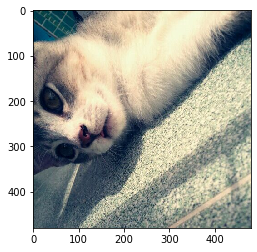

In [34]:
# 모자이크 모듈 사용 전 확인해 보기

img = cv2.imread('./facedata/cat.png')
# 이미지 출력하기
cv2.imwrite('./facedata/cat.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

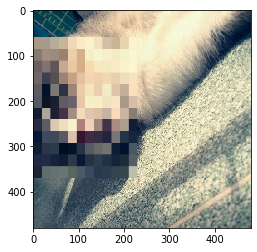

In [77]:
# import matplotlib.pyplot as plt
# import cv2
from mosaic import mosaic as mosaic

# 이미지를 읽어 들이고 모자이크 처리하기
img = cv2.imread('./facedata/cat.png')
mos = mosaic(img, (0, 60, 230, 370), 12) # 보강법
# mos = mosaic(img, (0, 60(y축-위에서 아래로), 230(x축-오른쪽에서 왼쪽으로), 370(y축-아래에서 위로)), 13)

# 이미지 출력하기
cv2.imwrite('/facedata/cat-mosaic.png', mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()



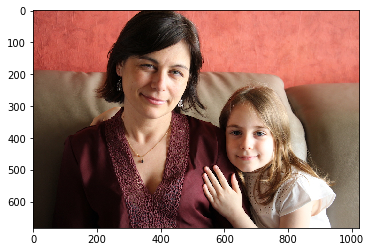

In [80]:
# 사람 얼굴에 자동으로 모자이크 처리하기
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

# 캐스캐이드 파일 지정해서 검출기 생성하기
cascade_file = './facedata/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어 들이고 그레이스케일로 변환하기
img = cv2.imread('./facedata/family.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

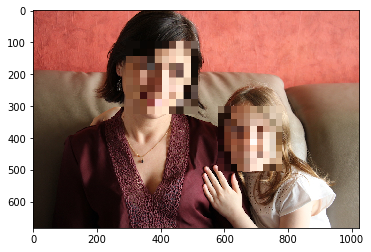

In [82]:
# img = cv2.imread("myphoto.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검출하기
face_list = cascade.detectMultiScale(img, minSize=(150, 150))
if len(face_list) == 0: quit()

# 인식한 부분에 모자이크 처리하기
for(x, y, w, h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)
    
cv2.imwrite("./facedata/family-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### Q. 5명 이상 얼굴 사진이 들어있는 이미지를 다운로드 받아 모자이크 처리
- 장면 위주로 된 이미지
- 정면,  옆면, 다양한 각도의 사진
- 웃는 얼굴
- 표정이 있는 얼굴
- 얼굴 크기가 다양한 이미지

In [1]:
# 모듈

import numpy as np
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

In [2]:
# 캐스케이드 파일 객체 생성

# source from: https://github.com/opencv/opencv/tree/master/data/haarcascades

cascade_file1 = "./data/haarcascade_frontalface_alt.xml"
cascade1 = cv2.CascadeClassifier(cascade_file1)

cascade_file2 = "./data/haarcascade_profileface.xml"
cascade2 = cv2.CascadeClassifier(cascade_file2)

cascade_file3 = "./data/haarcascade_smile.xml"
cascade3 = cv2.CascadeClassifier(cascade_file3)

cascades = [cascade1, cascade2, cascade3]

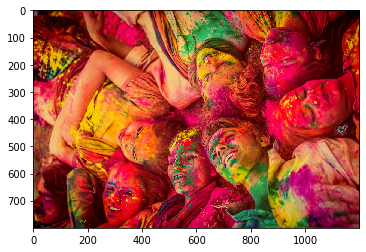

In [24]:
img = cv2.imread('./images/party1.jpg')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

얼굴의 좌표 = 128 356 342 171
얼굴의 좌표 = 212 210 329 165
얼굴의 좌표 = 444 75 438 219
얼굴의 좌표 = 586 390 365 182
얼굴의 좌표 = 553 496 523 262


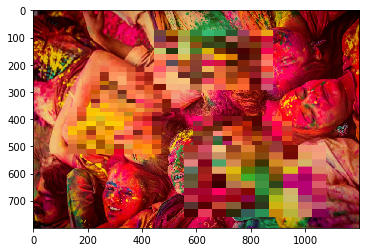

In [25]:
# 이미지 그레이스케일로 변환
img_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# 얼굴 검출하기
for cascade in cascades:
    face_list = cascade.detectMultiScale(img_gray, minSize=(150, 150))

if len(face_list) == 0: quit()

# 인식한 부분에 모자이크 처리하기
for (x,y,w,h) in face_list:
    print("얼굴의 좌표 =", x, y, w, h)
    img = mosaic(img, (x, y, x+w, y+h), 10)

# img = mosaic(img1, (128, 356, 470, 527), 10)
cv2.imwrite("./images/party1-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

얼굴의 좌표 = 128 356 342 171
얼굴의 좌표 = 212 210 329 165
얼굴의 좌표 = 586 390 365 182
얼굴의 좌표 = 444 75 438 219
얼굴의 좌표 = 553 496 523 262


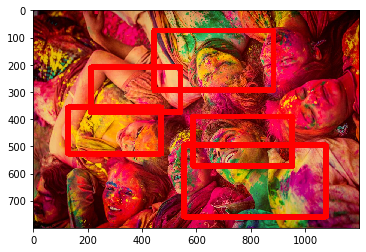

In [26]:
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
# 결과 확인하기 
if len(face_list) == 0:
    print("얼굴 인식 실패")
    quit()
# 인식한 부분 표시하기
for (x,y,w,h) in face_list:
    print("얼굴의 좌표 =", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img1, (x, y), (x+w, y+h), red, thickness=20)

# 이미지 출력하기
cv2.imwrite("./images/party-detect.png", img1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

## Q. 'girl.jpg' 사진을 읽어 와서 다음 사항을 수행하세요.
- 얼굴 검출하고 영역 표시하는 사용자 함수 만들기
- 여러 각도(0 ~ 80 도) 이미지 9개를 for문 과 subplot을 이용하여 만들고 모자이크 처리

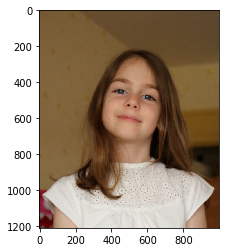

In [6]:
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

# 검출기 생성하고 이미지 읽어 들이기
cascade_file = "./facedata/haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)
img = cv2.imread("./facedata/girl.jpg")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

---0---
얼굴 좌표 = 319 308 405 405
---10---
얼굴 좌표 = 394 385 409 409
---20---
얼굴 좌표 = 451 444 408 408
---30---
얼굴 좌표 = 494 483 409 409
---40---
---50---
---60---
---70---
---80---


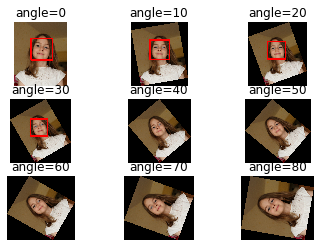

In [7]:
# 얼굴 검출하고 영역 표시하기
def face_detect(image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_list = cascade.detectMultiScale(image_gray, minSize=(300, 300))
    # 인식한 부분 표시하기
    for (x, y, w, h) in face_list:
        print('얼굴 좌표 =', x, y, w, h)
        red = (0, 0, 255)
        cv2.rectangle(image, (x, y), (x+w, y+h), red, thickness=30)
        
# 여러 각도의 이미지를 만들고 테스트하기
for i in range(0, 9):
    ang = i * 10
    print('---' + str(ang) + '---')
    img_r = ndimage.rotate(img, ang)
    face_detect(img_r)
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.title('angle=' + str(ang))
    plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))

plt.show()